# Project Intro

## Libraries

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from scipy import stats
import pickle

import warnings
warnings.filterwarnings("ignore")


# **1. Data Preparation and Data Cleaning**

In [2]:
df = pd.read_csv('../data/american_bankruptcy.csv')

In [3]:
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [5]:
# Rename "X" columns

df.rename(columns={
    'X1':'current_assets',
    'X2':'cost_of_goods_sold',
    'X3':'depreciation_and_amortization',
    'X4':'ebitda',
    'X5':'inventory',
    'X6':'net_income',
    'X7':'total_receivables',
    'X8':'market_value',
    'X9':'net_sales',
    'X10':'total_assets',
    'X11':'total_long_term_debt',
    'X12':'ebit',
    'X13':'gross_profit',
    'X14':'total_current_liabilities',
    'X15':'retained_earnings',
    'X16':'total_revenue',
    'X17':'total_liabilities',
    'X18':'total_operating_expenses'}, inplace=True)

df.head()

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [6]:
df.status_label.value_counts(normalize=True)

status_label
alive     0.933657
failed    0.066343
Name: proportion, dtype: float64

In [7]:
df.status_label = (df.status_label == 'failed').astype(int)
df.status_label.value_counts(normalize=True)

status_label
0    0.933657
1    0.066343
Name: proportion, dtype: float64

In [8]:
df.isnull().sum()

company_name                     0
status_label                     0
year                             0
current_assets                   0
cost_of_goods_sold               0
depreciation_and_amortization    0
ebitda                           0
inventory                        0
net_income                       0
total_receivables                0
market_value                     0
net_sales                        0
total_assets                     0
total_long_term_debt             0
ebit                             0
gross_profit                     0
total_current_liabilities        0
retained_earnings                0
total_revenue                    0
total_liabilities                0
total_operating_expenses         0
dtype: int64

In [9]:
df.rename(columns={'status_label':'bankruptcy'}, inplace=True)
df.head(1).T

,0
company_name,C_1
bankruptcy,0
year,1999
current_assets,511.267
cost_of_goods_sold,833.107
depreciation_and_amortization,18.373
ebitda,89.031
inventory,336.018
net_income,35.163
total_receivables,128.348


# **2. EDA**

In [10]:
def calculate_financial_ratios(df):
    df['year'] = pd.to_datetime(df['year'], format='%Y')
    # Financial ratios
    df['current_ratio'] = df['current_assets'] / df['total_current_liabilities']
    df['debt_ratio'] = df['total_liabilities'] / df['total_assets']
    df['profit_margin'] = df['net_income'] / df['net_sales']
    df['asset_turnover'] = df['net_sales'] / df['total_assets']
    df['ebitda_margin'] = df['ebitda'] / df['net_sales']

    return df

In [11]:
financial_ratios =  [
    'current_ratio',
    'debt_ratio',
    'profit_margin',
    'asset_turnover',
    'ebitda_margin']

In [12]:
df_with_ratios = calculate_financial_ratios(df)
df_with_ratios.head(1).T

,0
company_name,C_1
bankruptcy,0
year,1999-01-01 00:00:00
current_assets,511.267
cost_of_goods_sold,833.107
depreciation_and_amortization,18.373
ebitda,89.031
inventory,336.018
net_income,35.163
total_receivables,128.348


In [13]:
df_with_ratios.describe()[financial_ratios]

,current_ratio,debt_ratio,profit_margin,asset_turnover,ebitda_margin
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,3.491616,1.923343,-11.483463,1.177673,-8.676250
min,-12.721311,0.000041,-32545.000000,-31.586933,-29325.700000
25%,1.158053,0.302422,-0.174473,0.477908,-0.044176
50%,1.897068,0.507032,0.015439,0.889543,0.081687
75%,3.193725,0.710560,0.070352,1.458643,0.171586
max,24108.000000,6324.000000,1542.564516,420.000000,358.210526
std,88.748428,46.441906,279.732025,3.240847,214.708115


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company_name                   78682 non-null  object        
 1   bankruptcy                     78682 non-null  int64         
 2   year                           78682 non-null  datetime64[ns]
 3   current_assets                 78682 non-null  float64       
 4   cost_of_goods_sold             78682 non-null  float64       
 5   depreciation_and_amortization  78682 non-null  float64       
 6   ebitda                         78682 non-null  float64       
 7   inventory                      78682 non-null  float64       
 8   net_income                     78682 non-null  float64       
 9   total_receivables              78682 non-null  float64       
 10  market_value                   78682 non-null  float64       
 11  net_sales      

In [37]:
def analyze_correlations(df, target='bankruptcy'):

    # target 
    y = df[target]
    
    # numerical variables
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if col != target]
    
    # Calculate correlations
    correlations = {
        'spearman': {},
        'pearson': {}
    }
    
    for col in numeric_cols:
        # Spearman correlation
        spearman_corr, _ = stats.spearmanr(df[col], y)
        correlations['spearman'][col] = spearman_corr
        
        # Pearson correlation
        pearson_corr, _ = stats.pearsonr(df[col], y)
        correlations['pearson'][col] = pearson_corr
    
    # Create DataFrame
    corr_df = pd.DataFrame({
        'spearman_correlation': correlations['spearman'],
        'pearson_correlation': correlations['pearson']
    }).round(3)
    
    # Sort DataFrame by absolute Spearman correlation
    corr_df = corr_df.reindex(
        corr_df['spearman_correlation'].abs().sort_values(ascending=False).index
    )
    
    # Plotting
    plt.figure(figsize=(15,8))
    
    # Correlation comparison plot
    plt.subplot(1, 2, 1)
    plt.scatter(corr_df['pearson_correlation'],
                corr_df['spearman_correlation'],
                alpha=0.6)
    plt.plot([-1, 1], [-1, 1], 'r--')  # diagonal reference line
    plt.xlabel('Pearson Correlation')
    plt.ylabel('Spearman Correlation')
    plt.title('Comparison of Pearson vs Spearman\nCorrelations')
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Top 15 most correlated variables
    plt.subplot(1, 2, 2)
    top_15 = corr_df.head(15)
    
    # Plot both correlations
    x = np.arange(len(top_15))
    width = 0.35
    
    plt.barh(x + width/2, top_15['spearman_correlation'], width, 
             label='Spearman', alpha=0.8)
    plt.barh(x - width/2, top_15['pearson_correlation'], width,
             label='Pearson', alpha=0.8)
    
    plt.yticks(x, top_15.index)
    plt.xlabel('Correlation')
    plt.title('Top 15 Most Correlated Variables\n(Sorted by Spearman)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return corr_df

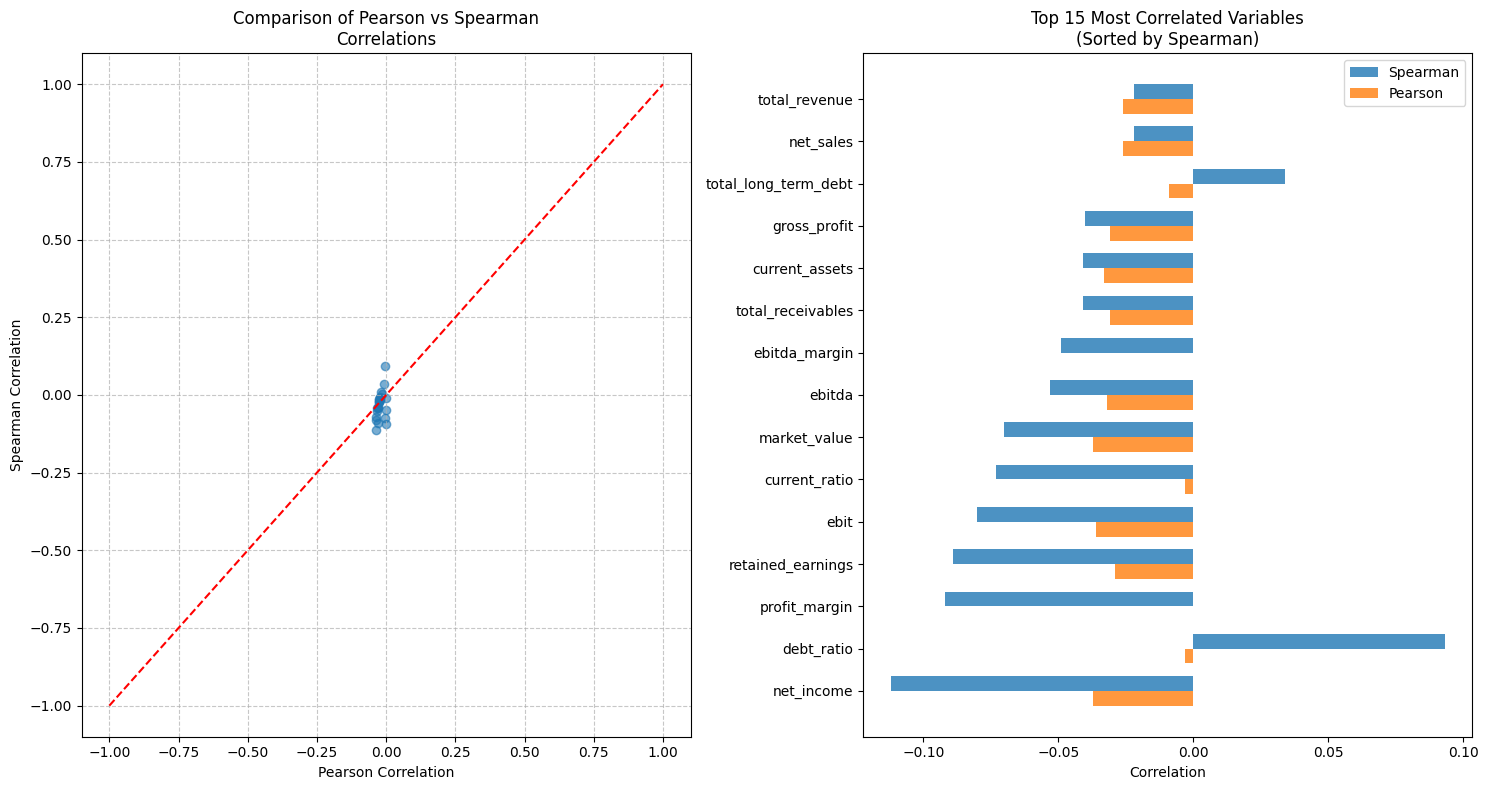

In [38]:
corr_results = analyze_correlations(df)

In [39]:
corr_results

,spearman_correlation,pearson_correlation
net_income,-0.112,-0.037
debt_ratio,0.093,-0.003
profit_margin,-0.092,0.000
retained_earnings,-0.089,-0.029
ebit,-0.080,-0.036
current_ratio,-0.073,-0.003
market_value,-0.070,-0.037
ebitda,-0.053,-0.032
ebitda_margin,-0.049,0.000
total_receivables,-0.041,-0.031


## Feature Selection 

using logistic regression and random forest


In [42]:
X = df.drop(columns=['company_name', 'bankruptcy', 'year'])
y = df['bankruptcy']

In [44]:
logit_model = LogisticRegression()
logit_model.fit(X, y)
logit_feature_importance = pd.Series(logit_model.coef_[0], index=X.columns).abs()
logit_feature_importance = logit_feature_importance.sort_values(ascending=False)
logit_feature_importance

current_ratio                    0.243468
debt_ratio                       0.119049
asset_turnover                   0.101771
ebitda_margin                    0.053284
profit_margin                    0.022114
inventory                        0.007381
current_assets                   0.006053
total_receivables                0.002678
depreciation_and_amortization    0.001391
ebitda                           0.001341
total_current_liabilities        0.001320
total_liabilities                0.001114
total_operating_expenses         0.000966
total_assets                     0.000560
cost_of_goods_sold               0.000521
market_value                     0.000504
net_sales                        0.000370
total_revenue                    0.000370
total_long_term_debt             0.000360
retained_earnings                0.000299
gross_profit                     0.000135
ebit                             0.000071
net_income                       0.000044
dtype: float64

In [45]:
scaler = RobustScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

In [46]:
logit_model_scaled = LogisticRegression(random_state=42)
logit_model.fit(X_scaled, y)

LogisticRegression()

In [47]:
# 4. Calcular y ordenar importancia de features
logit_feature_importance_scaled = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(logit_model.coef_[0])
})
logit_feature_importance_scaled = logit_feature_importance_scaled.sort_values('importance', ascending=False)
logit_feature_importance_scaled

,feature,importance
18,current_ratio,0.746377
7,market_value,0.391900
21,asset_turnover,0.317027
6,total_receivables,0.102011
1,cost_of_goods_sold,0.073315
12,gross_profit,0.071215
16,total_liabilities,0.069834
11,ebit,0.040880
4,inventory,0.036703
3,ebitda,0.033954


In [48]:
rf_model_scaled = RandomForestClassifier(random_state=42)
rf_model_scaled.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [49]:
rf_feature_importance_scaled = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(rf_model_scaled.feature_importances_)
})
rf_feature_importance_scaled = rf_feature_importance_scaled.sort_values('importance', ascending=False)
rf_feature_importance_scaled

,feature,importance
7,market_value,0.051920
14,retained_earnings,0.051107
19,debt_ratio,0.050365
2,depreciation_and_amortization,0.048117
6,total_receivables,0.047699
18,current_ratio,0.047050
12,gross_profit,0.046343
21,asset_turnover,0.046294
4,inventory,0.044207
0,current_assets,0.043465


## Feature Selection base on combine importance

In [50]:
def combine_feature_importance(logit_feature_importance_scaled, rf_feature_importance_scaled, n_features=None):
    # Normalize importances for each model (0-1)
    logit_max = logit_feature_importance_scaled['importance'].max()
    rf_max = rf_feature_importance_scaled['importance'].max()
    
    # Create combine DF
    combined_importance = pd.DataFrame({
        'feature': logit_feature_importance_scaled['feature'],
        'logit_norm': logit_feature_importance_scaled['importance'] / logit_max,
        'rf_norm': rf_feature_importance_scaled['importance'] / rf_max
    })
    
    # Calculate average of normalized importances
    combined_importance['mean_importance'] = (
        combined_importance['logit_norm'] + combined_importance['rf_norm']
    ) / 2
    
    # Sort by average importance
    combined_importance = combined_importance.sort_values(
        'mean_importance', ascending=False
    )
    
    # If n_features is specified, select the top n
    if n_features:
        combined_importance = combined_importance.head(n_features)
        
    return combined_importance

In [51]:
combined_features = combine_feature_importance(
    logit_feature_importance_scaled,
    rf_feature_importance_scaled,
    n_features=15
)

In [52]:
combined_features

,feature,logit_norm,rf_norm,mean_importance
18,current_ratio,1.000000,0.906211,0.953105
7,market_value,0.525070,1.000000,0.762535
21,asset_turnover,0.424755,0.891647,0.658201
6,total_receivables,0.136676,0.918713,0.527694
14,retained_earnings,0.007863,0.984337,0.496100
12,gross_profit,0.095414,0.892587,0.494001
19,debt_ratio,0.000076,0.970044,0.485060
2,depreciation_and_amortization,0.005597,0.926758,0.466178
16,total_liabilities,0.093564,0.821723,0.457643
1,cost_of_goods_sold,0.098228,0.805090,0.451659


# **3. Model Selection**

In [62]:
final_features = combined_features.feature.to_list()

In [56]:
df_with_ratios.head(2)

,company_name,bankruptcy,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,...,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses,current_ratio,debt_ratio,profit_margin,asset_turnover,ebitda_margin
0,C_1,0,1999-01-01,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,163.816,201.026,1024.333,401.483,935.302,3.120983,0.541814,0.034328,1.382369,0.086916
1,C_1,0,2000-01-01,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,125.392,204.065,874.255,361.642,809.888,3.874697,0.515267,0.021196,1.245637,0.073625


## Train-Val-Test Split

In [71]:
# Conditions for splitting the data

train_condition = df_with_ratios['year'] <= pd.to_datetime('2011')
val_condition = (df_with_ratios['year'] >= pd.to_datetime('2012')) & (df_with_ratios['year']<= pd.to_datetime('2014'))
test_condition = df_with_ratios['year'] > pd.to_datetime('2014')

In [78]:
df_train = df_with_ratios[train_condition]
df_val = df_with_ratios[val_condition]
df_test = df_with_ratios[test_condition]

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)
print(df_with_ratios.shape)
print(df_train.shape[0]+df_val.shape[0]+df_test.shape[0])

(55927, 26)
(10473, 26)
(12282, 26)
(78682, 26)
78682


In [81]:
print("Proportion of data per set:")
print(f"Training: {(train_condition).mean():.2%}")
print(f"Validation: {(val_condition).mean():.2%}")
print(f"Test: {(test_condition).mean():.2%}")
print(f"Not assigned: {(~(train_condition | val_condition | test_condition)).mean():.2%}")


print("\nIntersection between sets (must be 0):")
print(f"Train-Val: {(train_condition & val_condition).sum()}")
print(f"Train-Test: {(train_condition & test_condition).sum()}")
print(f"Val-Test: {(val_condition & test_condition).sum()}")

Proportion of data per set:
Training: 71.08%
Validation: 13.31%
Test: 15.61%
Not assigned: 0.00%

Intersection between sets (must be 0):
Train-Val: 0
Train-Test: 0
Val-Test: 0


In [83]:
X_train = df_train[final_features]
X_val = df_val[final_features]
X_test = df_test[final_features]

y_train = df_train['bankruptcy']
y_val = df_val['bankruptcy']
y_test = df_test['bankruptcy']

In [84]:
X_train

,current_ratio,market_value,asset_turnover,total_receivables,retained_earnings,gross_profit,debt_ratio,depreciation_and_amortization,total_liabilities,cost_of_goods_sold,inventory,ebit,current_assets,total_current_liabilities,net_income
0,3.120983,372.7519,1.382369,128.348,201.026,191.226,0.541814,18.373,401.483,833.107,336.018,70.658,511.267,163.816,35.163
1,3.874697,377.1180,1.245637,115.187,204.065,160.444,0.515267,18.577,361.642,713.811,320.590,45.790,485.856,125.392,18.531
2,2.902063,364.5928,0.899355,77.528,139.603,112.244,0.563172,22.496,399.964,526.477,286.588,4.711,436.656,150.464,-58.939
3,1.947253,143.3295,0.883074,66.322,124.106,109.590,0.570377,27.172,391.633,496.747,259.954,3.573,396.412,203.575,-12.410
4,3.292707,308.9071,0.919167,104.661,131.884,128.656,0.574669,26.680,407.608,523.302,247.245,20.811,432.204,131.261,3.504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78632,4.883580,397.7911,0.638727,35.684,15.196,48.848,0.264699,7.564,90.833,170.335,37.372,32.155,215.654,44.159,23.094
78633,6.774631,513.0454,0.804386,35.677,34.729,70.874,0.251804,9.119,97.006,239.011,57.439,51.615,242.525,35.799,34.509
78645,0.173298,4.2105,0.008173,1.500,-110.325,0.100,0.636210,1.806,11.677,0.050,0.000,-13.480,1.677,9.677,-15.668
78652,2.897183,19420.6232,1.614145,3747.000,1668.000,5169.000,0.545148,1123.000,13898.000,35982.000,4824.000,3068.000,13779.000,4756.000,10151.000


## Random Forest Classifier

In [93]:
def train_optimize_rf(X_train, X_val, y_train, y_val, random_state=42):
    # define grid params
    param_grid = {
        'n_estimators':[10, 50, 100, 200, 400],
        'max_depth':[3, 5, 10, 15],
        'min_samples_leaf':[1, 3, 5, 10, 50]
    }
    
    # Initialize variables to save best results
    best_auc = 0
    best_params = None
    best_model = None
    
    results = []
    
    # Grid Search
    for n_est in param_grid['n_estimators']:
        for depth in param_grid['max_depth']:
            for min_leaf in param_grid['min_samples_leaf']:
                
                rf = RandomForestClassifier(
                    n_estimators=n_est,
                    max_depth=depth,
                    min_samples_leaf=min_leaf,
                    random_state=random_state,
                    n_jobs=-1
                )
                rf.fit(X_train, y_train)
                
                y_pred = rf.predict_proba(X_val)[:, 1]
                
                auc = roc_auc_score(y_val, y_pred)
                
                results.append({
                    'n_estimators':n_est,
                    'max_depth':depth,
                    'min_samples_leaf':min_leaf,
                    'auc':auc
                })
                
                if auc > best_auc:
                    best_auc = auc
                    best_params = {
                        'n_estimators':n_est,
                        'max_depth':depth,
                        'min_samples_leaf':min_leaf
                    }
                    best_model = rf
                    
    results_df = pd.DataFrame(results)
    
    results_df = results_df.sort_values('auc', ascending=False)
    # Print best results
    print("\nBest 5 parameter combinations:")
    print(results_df.head())
    
    print(f"\nBest AUC found: {best_auc:.4f}")
    print("\nBest Params:")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    
    # Plots
    plt.figure(figsize=(15, 5))
    
    # Plot1 1: AUC vs n_estimators
    plt.subplot(131)
    sns.lineplot(data=results_df, x='n_estimators', y='auc', ci=None,
                )  
    plt.title('AUC vs n_estimators')
    plt.grid(True, linestyle='--', alpha=0.7)  
    
    # Plot 2: AUC vs max_depth
    plt.subplot(132)
    
    plot_df = results_df.copy()
    max_depth_values = plot_df['max_depth'].unique()
    max_depth_values = [d for d in max_depth_values if d is not None]
    if None in plot_df['max_depth'].values:
        plot_df['max_depth'] = plot_df['max_depth'].fillna(max(max_depth_values) + 2)
    
    sns.lineplot(data=plot_df, x='max_depth', y='auc', ci=None,
                )
    if None in results_df['max_depth'].values:
        
        xticks = plt.gca().get_xticks()
        xticks_labels = [str(int(x)) if x != max(max_depth_values) + 2 else 'None' 
                        for x in xticks]
        plt.gca().set_xticklabels(xticks_labels)
    plt.title('AUC vs max_depth')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Plot 3: AUC vs min_samples_leaf
    plt.subplot(133)
    sns.lineplot(data=results_df, x='min_samples_leaf', y='auc', ci=None,
                )
    plt.title('AUC vs min_samples_leaf')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'best_model': best_model,
        'best_params': best_params,
        'best_auc': best_auc,
        'all_results': results_df
    }


Best 5 parameter combinations:
    n_estimators  max_depth  min_samples_leaf       auc
97           400         15                 5  0.859679
96           400         15                 3  0.859153
77           200         15                 5  0.858436
76           200         15                 3  0.858211
95           400         15                 1  0.857097

Best AUC found: 0.8597

Best Params:
n_estimators: 400
max_depth: 15
min_samples_leaf: 5


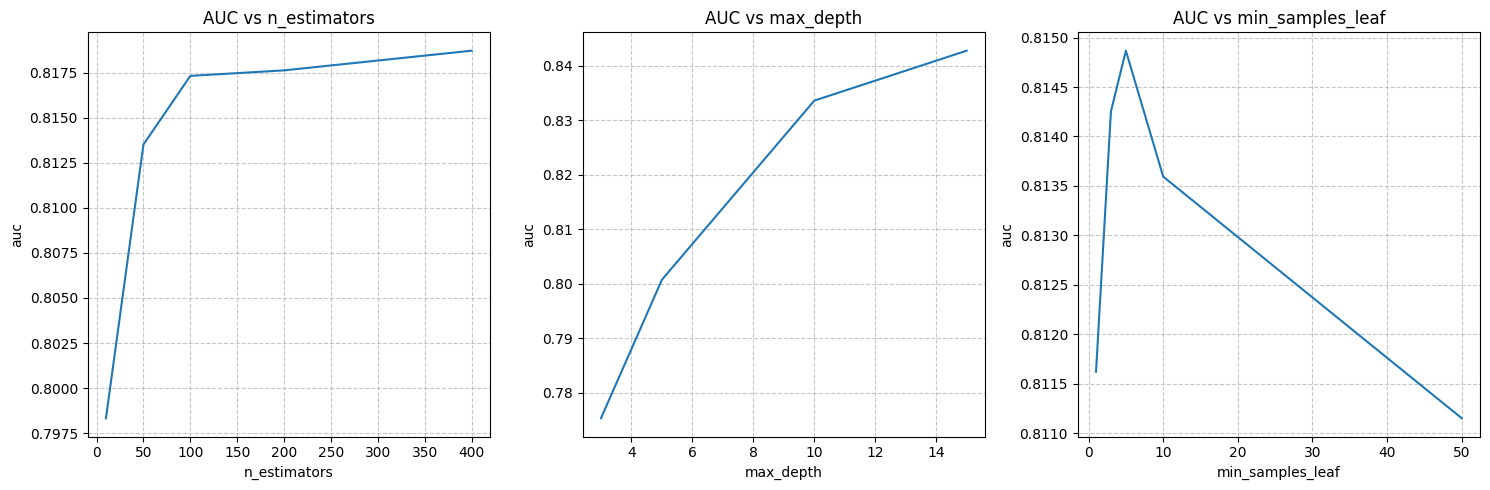

In [94]:
results_rf = train_optimize_rf(X_train, X_val, y_train, y_val)
best_rf = results_rf['best_model']

## XGBoost Classifier

In [101]:
def train_optimize_xgb(X_train, X_val, y_train, y_val, random_state=42):
   
   # Definir grid de parámetros
   param_grid = {
       'eta': [0.01, 0.05, 0.1, 0.3],  # learning rate
       'max_depth': [3, 5, 7, 10, 15],
       'min_child_weight': [1, 10, 15, 30]
   }
   
   # Inicializar variables para guardar mejores resultados
   best_auc = 0
   best_params = None
   best_model = None
   
   # Para guardar todos los resultados
   results = []
   
   # Grid search manual
   for eta in param_grid['eta']:
       for depth in param_grid['max_depth']:
           for min_child in param_grid['min_child_weight']:
               
               # Crear y entrenar modelo
               xg = xgb.XGBClassifier(
                   eta=eta,
                   max_depth=depth,
                   min_child_weight=min_child,
                   random_state=random_state,
                   n_estimators=100,  
                   use_label_encoder=False,
                   eval_metric='auc',
                   objective = 'binary:logistic'
                   
               )
               
               # Entrenar modelo
               xg.fit(X_train, y_train,
                      eval_set=[(X_val, y_val)],
                      verbose=False)
               
               # Predecir probabilidades
               y_pred_proba = xg.predict_proba(X_val)[:, 1]
               
               # Calcular AUC
               auc = roc_auc_score(y_val, y_pred_proba)
               
               # Guardar resultados
               results.append({
                   'eta': eta,
                   'max_depth': depth,
                   'min_child_weight': min_child,
                   'auc': auc
               })
               
               # Actualizar mejor modelo si mejora AUC
               if auc > best_auc:
                   best_auc = auc
                   best_params = {
                       'eta': eta,
                       'max_depth': depth,
                       'min_child_weight': min_child
                   }
                   best_model = xg
   
   # Convertir resultados a DataFrame
   results_df = pd.DataFrame(results)
   
   # Ordenar resultados por AUC
   results_df = results_df.sort_values('auc', ascending=False)
   
   # Imprimir mejores resultados
   print("\nMejores 5 combinaciones de parámetros:")
   print(results_df.head())
   
   print(f"\nMejor AUC encontrado: {best_auc:.4f}")
   print("\nMejores parámetros:")
   for param, value in best_params.items():
       print(f"{param}: {value}")
   
   # Crear visualizaciones
   plt.figure(figsize=(15, 5))
   
   # Gráfico 1: AUC vs eta
   plt.subplot(131)
   sns.lineplot(data=results_df, x='eta', y='auc', ci=None,
               marker='o')
   plt.title('AUC vs Learning Rate (eta)')
   plt.grid(True, linestyle='--', alpha=0.7)
   
   # Gráfico 2: AUC vs max_depth
   plt.subplot(132)
   sns.lineplot(data=results_df, x='max_depth', y='auc', ci=None,
               marker='o')
   plt.title('AUC vs max_depth')
   plt.grid(True, linestyle='--', alpha=0.7)
   
   # Gráfico 3: AUC vs min_child_weight
   plt.subplot(133)
   sns.lineplot(data=results_df, x='min_child_weight', y='auc', ci=None,
               marker='o')
   plt.title('AUC vs min_child_weight')
   plt.grid(True, linestyle='--', alpha=0.7)
   
   plt.tight_layout()
   plt.show()
   
   return {
       'best_model': best_model,
       'best_params': best_params,
       'best_auc': best_auc,
       'all_results': results_df
   }



Mejores 5 combinaciones de parámetros:
     eta  max_depth  min_child_weight       auc
76  0.30         15                 1  0.856133
36  0.05         15                 1  0.856096
52  0.10         10                 1  0.855668
56  0.10         15                 1  0.854885
32  0.05         10                 1  0.850428

Mejor AUC encontrado: 0.8561

Mejores parámetros:
eta: 0.3
max_depth: 15
min_child_weight: 1


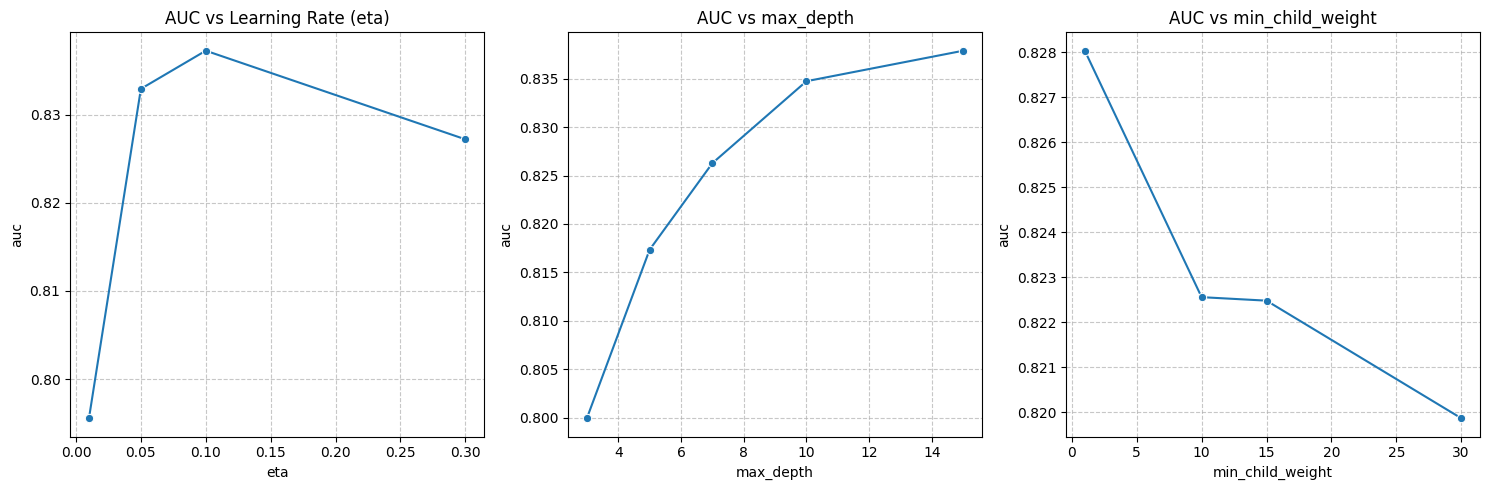

In [102]:
results_xgb = train_optimize_xgb(X_train, X_val, y_train, y_val)
best_xgb = results_xgb['best_model']

In [103]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='auc',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

## Selecting the final model

In [109]:
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.8596793984773407)

In [107]:
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.8561330966003572)

In [111]:
y_test.value_counts()

bankruptcy
0    11995
1      287
Name: count, dtype: int64

In [115]:
def compare_models(best_rf, best_xgb, X_val, y_val):   
   # Random Forest predictions
   rf_pred_proba = best_rf.predict_proba(X_val)[:, 1]
   rf_auc = roc_auc_score(y_val, rf_pred_proba)
   
   # XGBoost Predictions
   xgb_pred_proba = best_xgb.predict_proba(X_val)[:, 1]
   xgb_auc = roc_auc_score(y_val, xgb_pred_proba)
   
   # Comopare Results
   print("Results on validation set:")
   print(f"Random Forest AUC: {rf_auc:.4f}")
   print(f"XGBoost AUC: {xgb_auc:.4f}")
   
   # Plot ROC Curve
   plt.figure(figsize=(8, 6))
   
   # RF Curve
   fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_pred_proba)
   plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.4f})')
   
   # XGB Curve
   fpr_xgb, tpr_xgb, _ = roc_curve(y_val, xgb_pred_proba)
   plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_auc:.4f})')
   
   
   plt.plot([0, 1], [0, 1], 'r--')
   
   plt.xlabel('FP Rate')
   plt.ylabel('TP Rate')
   plt.title('Roc Curves - Model Comparison\n(Validation Set)')
   plt.legend()
   plt.grid(True, linestyle='--', alpha=0.7)
   plt.show()
   
   return {
       'rf_auc': rf_auc,
       'xgb_auc': xgb_auc,
       'rf_pred_proba': rf_pred_proba,
       'xgb_pred_proba': xgb_pred_proba,
       'rf_roc': (fpr_rf, tpr_rf),
       'xgb_roc': (fpr_xgb, tpr_xgb)
   }


Results on validation set:
Random Forest AUC: 0.8597
XGBoost AUC: 0.8561


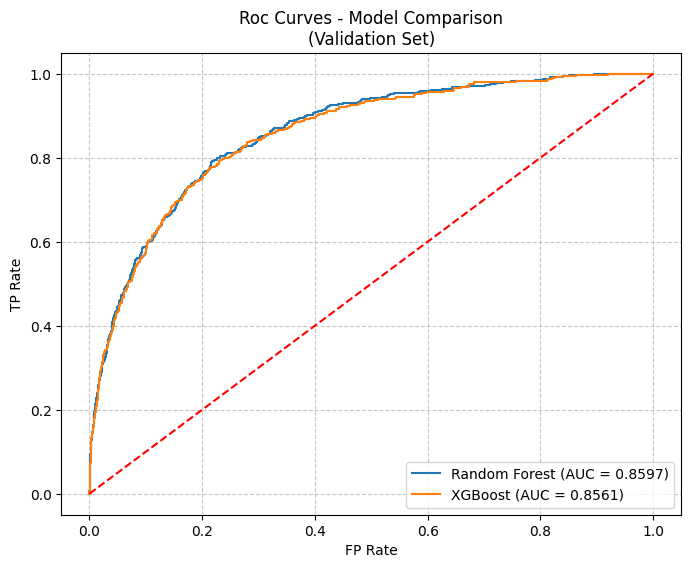

In [116]:
final_results = compare_models(best_rf, best_xgb, X_val, y_val)

Random Forest is the best model!

## Save the model

In [120]:
output_file = f"model_C=1.0.bin"
output_file

'model_C=1.0.bin'

In [121]:
with open('../models/' + output_file, 'wb') as f_out:
    pickle.dump(best_rf, f_out)